In [34]:
import numpy as np
import pandas as pd
from knn import KNN
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


Load the data from the data set, X,y will be the data from the training dataset and X_val and y_val from the validation set

In [35]:

df_input = pd.read_csv('training.csv', sep=',')
X, y = df_input[['X1', 'X2']].values, df_input['y'].values


df_validation = pd.read_csv('validation.csv', sep=',')
X_val, y_val = df_validation[['X1', 'X2']].values, df_validation['y'].values
xx_val, yy_val = df_validation['X1'].values, df_validation['X2'].values


Training with our model implemented from scratch and a chosen k (here is 33) and plot the results using utils.plot

In [41]:
# Parameter K defining the KNN algorithm
k=39

# Create a model for the KNN
knn_model_k = KNN(k)
knn_model_k.train(X, y)
y_val_k=knn_model_k.predict(X_val,2)

#calculating the accuracy
accuracy = accuracy_score(y_val, y_val_k)
print("The accuracy of our classifier is {}".format(100*accuracy))


#after p tuning ; ( k=39 ; The accuracy of our classifier is The accuracy of our classifier is 82.08333333333333)

The accuracy of our classifier is 81.45833333333333


training the scikit learn model for a chosen k to compare with our implementation

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k=39

knn = KNeighborsClassifier(k)

# fitting the model
knn.fit(X, y)

# predict the response
pred = knn.predict(X_val)



# evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_val, pred)))

accuracy: 0.8145833333333333


Parameter tuning using k-fold cross-validation - implementation from scratch

The optimal number of neighbors is 39


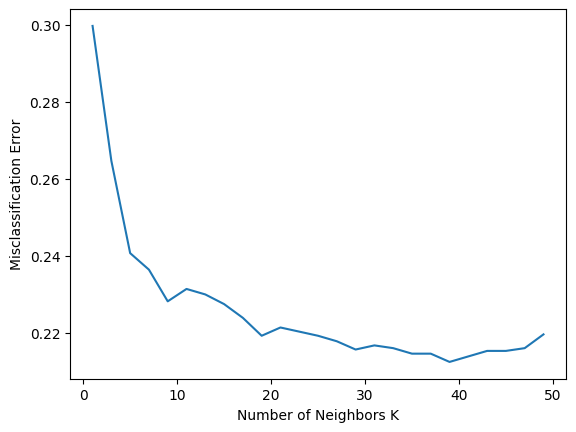

In [38]:

def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Create K-Fold Cross-Validation for KNN
def cross_validation_knn(X, y, k_fold, p):
    # creating odd list of K for KNN
    neighbors = list(range(1, 50,2))

    # empty list that will hold cv scores
    cv_scores = []

    # Get the fold indices
    fold_indices = kfold_indices(X, k_fold)

    # Iterate through different values of k
    for k in neighbors:
        scores = []
        for train_indices, test_indices in fold_indices:
            X_train, y_train = X[train_indices], y[train_indices]
            X_test, y_test = X[test_indices], y[test_indices]

            # Train the model on the training data
            knn = KNN(k)
            knn.train(X_train, y_train)

            # Make predictions on the test data
            y_pred = knn.predict(X_test, p)

            # Calculate the accuracy score for this fold
            fold_score = accuracy_score(y_test, y_pred)

            # Append the fold score to the list of scores
            scores.append(fold_score)

        # Calculate the mean accuracy across all folds for this value of k
        cv_scores.append(np.mean(scores))

    # changing to misclassification error
    mse = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbors[mse.index(min(mse))]
    print("The optimal number of neighbors is {}".format(optimal_k))

    # plot misclassification error vs k
    plt.plot(neighbors, mse)
    plt.xlabel("Number of Neighbors K")
    plt.ylabel("Misclassification Error")
    plt.show()

    return optimal_k

optimal_k_value = cross_validation_knn(X, y, 5, 2)

# The optimal number of neighbors is 39



c:\Python311\Lib\site-packages\scipy\spatial\_kdtree.py:60: RuntimeWarning: overflow encountered in power
  return np.sum(np.abs(y-x)**p, axis=-1)
C:\Users\33681\AppData\Local\Temp\ipykernel_15524\62185693.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0','1','2','3','5','50','100000000'])


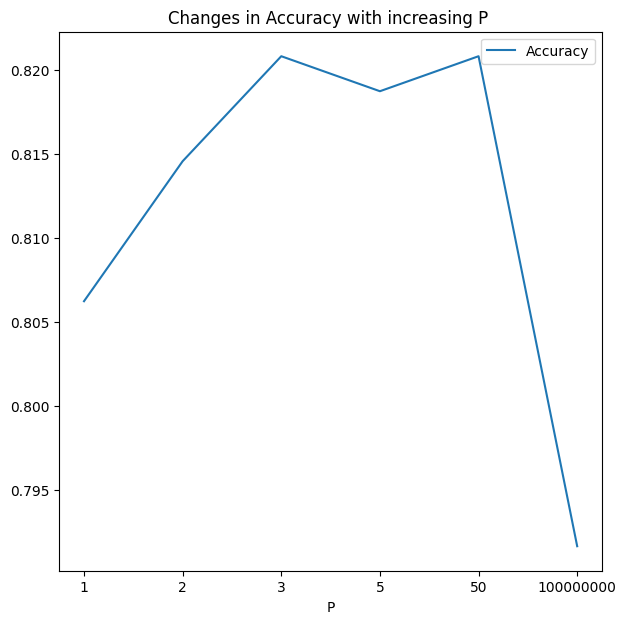

In [39]:
distances=[1,2,3,5,50,100000000]

accuracy=[]

k=39
knn_model_p = KNN(k)
knn_model_p.train(X, y)

for i, val in enumerate(distances):
    Z=knn_model_p.predict(X_val,val)
    acc= accuracy_score(y_val, Z)
    accuracy.append(acc)
fig,ax=plt.subplots(figsize=(7,7))
ax.plot(accuracy)
ax.set_xticklabels(['0','1','2','3','5','50','100000000'])
ax.set_title("Changes in Accuracy with increasing P ")
ax.set_xlabel('P')
ax.legend(['Accuracy'])

scikit learn implementation (with scikit learn model) of the cross validation

The optimal number of neighbors is 39


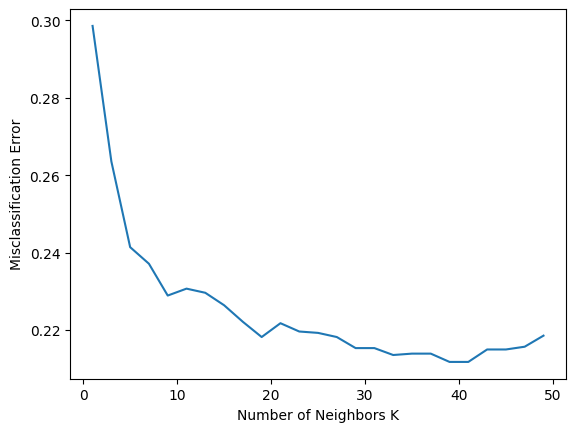

In [40]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# The optimal number of neighbors is 39
